In [1]:
import os, sys, string, time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
from matplotlib import patheffects
import joblib
from datetime import date
import csv

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Functions as Functions
import Utilities.Variables_list as Var_list
from Utilities.ipython_exit import exit

print ('Success')


Success


## Reading limit .csvs

In [15]:
samples = ["SIN","PIENU","E949"] #"PS191", "KEK_1982"
print("Plotting these limits: " + str(samples))
plot_dict = {}
for sample in samples:
    plot_dict[sample] = Functions.Pandafy(Constants.limit_locs[sample])

#-----MY CURRENT observed limits-----#
uboone_ee_obs = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_8_bins_ee_full_Finished_10.csv')
uboone_ee_old = Functions.Pandafy('limit_files/Brazil_plot/obs_limit_ee_21_April.csv')
uboone_pi0_obs = Functions.Pandafy('limit_files/My_limits/Full_sys_8_bins_pi0_pi0_full_Finished_10.csv')
uboone_ee_Finished = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_full_hist_EXT_full_Finished.csv')
uboone_pi0_Finished = Functions.Pandafy('limit_files/My_limits/Full_sys_full_hist_pi0_Finished_pi0_23_May.csv')

uboone_combined = Functions.Pandafy('limit_files/My_limits/combined_ee_pi0_full_finished.csv')

uboone_ee_no_end = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_8_bins_ee_full_Finished_10.csv')
uboone_pi0_no_end = Functions.Pandafy('limit_files/My_limits/Full_sys_8_bins_pi0_pi0_full_Finished_10.csv')


#-----MY EXPECTED limits, other uboone limits-----#
uboone_ee_current = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_20_April.csv')

uboone_ee_run1 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run1.csv')
uboone_ee_run3 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run3.csv')

Ten_event_limit = Functions.Pandafy('limit_files/My_limits/10_event_expected_mu_run3.csv')

# uboone_ee_old = Functions.Pandafy('limit_files/My_limits/Pre_scaled_limit.csv')

uboone_mupi = Functions.Pandafy('limit_files/uboone_mupi.csv')

#-----Other non-uboone limits/projections-----#
KEK_1984 = Functions.Pandafy('limit_files/KEK_1984_E89_plus_E104.csv')
KEK_1982 = Functions.Pandafy('limit_files/KEK_1982.csv')
PS191_Dirac = Functions.Pandafy('limit_files/PS191_1988.csv')
T2K_observed = Functions.Pandafy('limit_files/T2K_Umu4_observed_2019.csv')
NA62_observed = Functions.Pandafy('limit_files/NA62_limit.csv')
Theorist_Pawels = Functions.Pandafy('limit_files/Reinterp_Pawels_result.csv')
T2K_recast = Functions.Pandafy('limit_files/T2K_recast_full_data.csv')
Wrong_PS191_K = Functions.Pandafy('limit_files/PS191_ee_reinterp_NC_2005.csv')
Wrong_PS191_pion = Functions.Pandafy('limit_files/PS191_pion_ee_reinterp_NC_2005.csv')
PS191_redone_2022 = Functions.Pandafy('limit_files/Nicolo_redone_PS191.csv')
# BBN = Functions.Pandafy('limit_files/BBN_Nicolo_paper.csv')
BBN = Functions.Pandafy('limit_files/BBN_Umu4_new.csv')

point = [150,4.26974152748967e-07]


Plotting these limits: ['SIN', 'PIENU', 'E949']


In [22]:
print(uboone_ee_obs)

   Mass         Value
0    10  1.000000e+00
0    10  3.318729e-03
1    20  3.819729e-04
2    50  2.962285e-05
3   100  2.944057e-06
4   150  5.986790e-07
0   150  1.000000e+00


## Plotting limits < 250MeV

Do you want to save the figure as limits_31_08_uboone_combined_blue_Majorana? y/n y


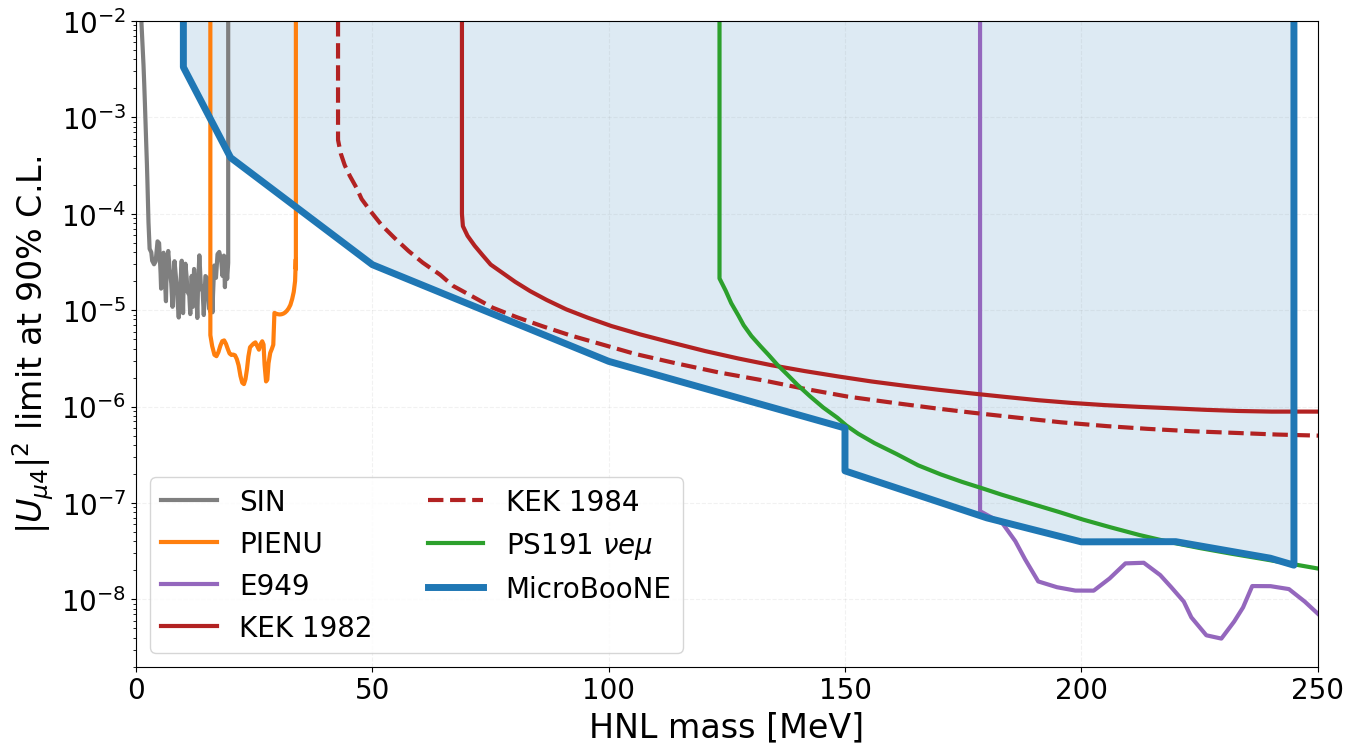

In [29]:
#----MAJORANA----#
#Only the beam dump searches change the limit for Majorana. 
style_ps = '-'
style_ds = '-'
transp = 0.05

Plot_Dirac_and_Maj = False

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

Maj_factor = 1/(np.sqrt(2))
Run2_factor = 1/(np.sqrt(1.5))

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    # plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    
plt.plot(KEK_1982['Mass'],KEK_1982['Value'],label=r"KEK 1982",color="firebrick",lw=3) #C3 originally
# plt.fill_between(KEK_1982['Mass'],KEK_1982['Value'],1,color="C3",alpha=0.1)

plt.plot(KEK_1984['Mass'],KEK_1984['Value'],label=r"KEK 1984",color="firebrick",lw=3, ls="dashed")
# plt.fill_between(KEK_1984['Mass'],KEK_1984['Value'],1,color="C3",alpha=0.1)

plt.plot(PS191_Dirac['Mass'],PS191_Dirac['Value']*Maj_factor,label=r"PS191 $\nu e \mu$",color="C2",lw=3)
# plt.fill_between(PS191_Dirac['Mass'],PS191_Dirac['Value']*Maj_factor,1,color="C2",alpha=0.1)

# plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu ee$",color="C10",lw=4)
# plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

# plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE",color="C3",lw=5)
# plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

# plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
# plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

# plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],color="C3",lw=5)
# plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_combined['Mass'],uboone_combined['Value'],label=r"MicroBooNE",color="C10",lw=5)
plt.fill_between(uboone_combined['Mass'],uboone_combined['Value'],1,color="C10",alpha=0.15)

# plt.plot(Theorist_Pawels['Mass'],Theorist_Pawels['Value'],label=r"Recast",color="black",lw=2, ls="dashed")

# plt.plot(uboone_pi0_Finished['Mass'],uboone_pi0_Finished['Value'],label=r"OLD MicroBooNE $\nu\pi^{0}$",color="black",lw=2)

if Plot_Dirac_and_Maj==True:
    plt.plot(PS191_Dirac['Mass'],PS191_Dirac['Value'],label=r"PS191 Dirac $\mu e$",color="C2",lw=3, linestyle="dashed")
    plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Dirac_ee_scale,label=r"MicroBooNE Dirac $e^{+}e^{-}$",color="C10",lw=4, linestyle="dashed")
    plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Dirac_pi0_scale,label=r"MicroBooNE Dirac $\nu\pi^{0}$",color="skyblue",lw=4, linestyle="dashed")

# plt.plot(PS191_redone_2022['Mass'],PS191_redone_2022['Value'],label=r"PS191 Redone $e e$",color="black",lw=3, linestyle="dashed")
# plt.plot(Wrong_PS191_K['Mass'],Wrong_PS191_K['Value'],label=r"PS191 original $e e$",color="red",lw=3, linestyle="dashed")
# plt.plot(T2K_recast['Mass'],T2K_recast['Value'],label=r"T2K Recast",color="black",lw=3, linestyle="dashed")
# lower_lim_BBN = np.full(101, 1e-8)

plt.xlabel('HNL mass [MeV]',fontsize=24)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=24)
# plt.legend()
plt.ylim(2e-9,1e-2)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=2)

plt.tight_layout()

today = date.today()
d1 = today.strftime("%d_%m")

name = f"limits_{d1}_uboone_combined_blue_"
if Plot_Dirac_and_Maj==True: name += "Majorana_and_Dirac"
else: name += "Majorana"

savefig = input(f"Do you want to save the figure as {name}? y/n")

if savefig == "y":
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


Do you want to save the figure as Existing_limits_09_08_Dirac_both_KEK_BBN? y/n n


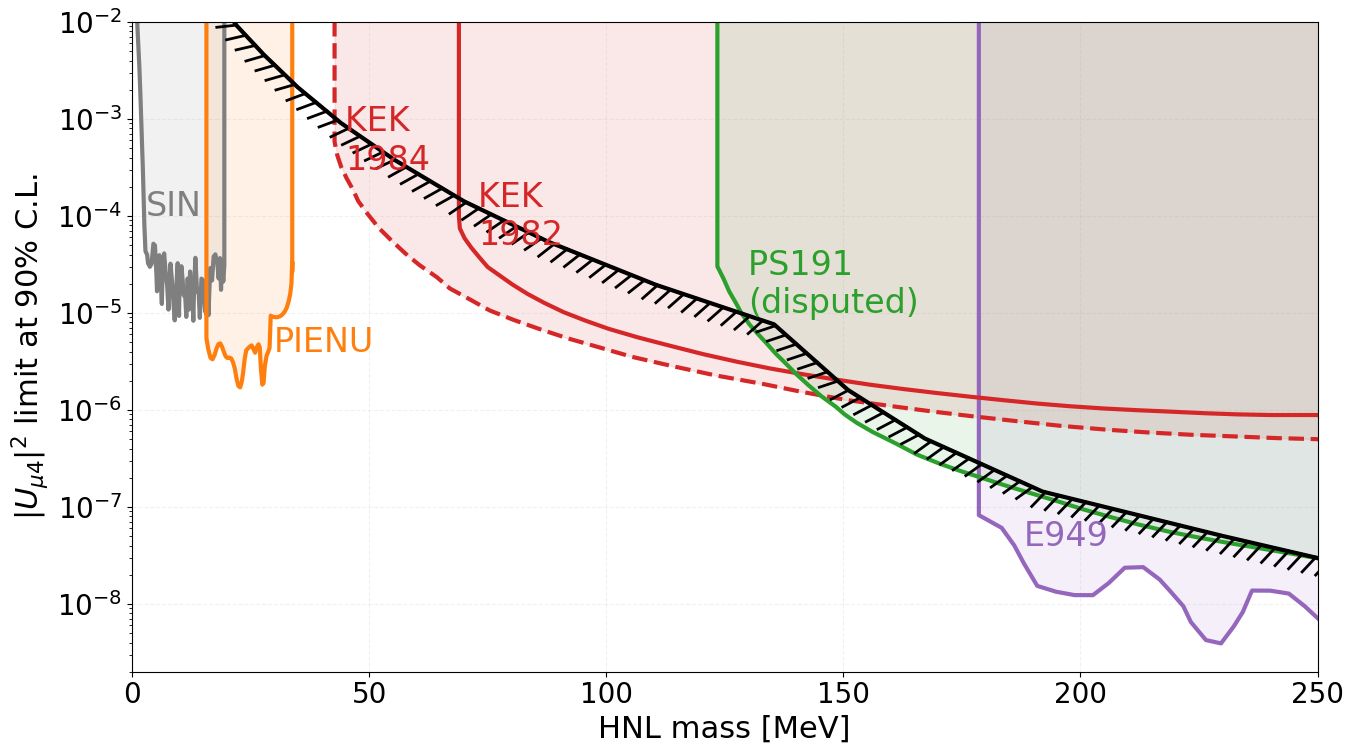

In [4]:
#----DIRAC----#
#Only the beam dump searches change the limit for Majorana. 
style_ps = '-'
style_ds = '-'
transp = 0.05

Plot_Dirac_and_Maj = False

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

Maj_factor = 1/(np.sqrt(2))

text_positions = {"SIN":[3, 1e-4],
                 "PIENU":[30, 4e-6],
                 "PS191":[130,1e-5],
                 "KEK":[60,5e-5], 
                 "KEK_1982":[60,5e-5],
                 "E949":[188, 4e-8]}

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    plt.text(text_positions[sample][0],text_positions[sample][1],f"{sample}", color=Constants.limit_colours[sample], fontsize=24)
    
plt.plot(KEK_1982['Mass'],KEK_1982['Value'],label=r"KEK 1982",color="C3",lw=3)
# plt.fill_between(KEK_1982['Mass'],KEK_1982['Value'],1,color="C3",alpha=0.1)

plt.plot(KEK_1984['Mass'],KEK_1984['Value'],label=r"KEK 1984",color="C3",lw=3, ls="dashed")
plt.fill_between(KEK_1984['Mass'],KEK_1984['Value'],1,color="C3",alpha=0.1)
    
plt.plot(PS191_Dirac['Mass'],PS191_Dirac['Value'],label=r"PS191 $\mu e$",color="C2",lw=3)
plt.fill_between(PS191_Dirac['Mass'],PS191_Dirac['Value'],1,color="C2",alpha=0.1)

plt.plot(BBN['Mass'], BBN['Value'],'-',color='black',lw=2, path_effects=[patheffects.withTickedStroke(spacing=10, angle=240)])
plt.plot(BBN['Mass'], BBN['Value'],'-', label=r'BBN',lw=3,color='black')

# plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Maj_factor,label=r"MicroBooNE $e^{+}e^{-}$",color="C10",lw=4)
# plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Maj_factor,1,color="C10",alpha=0.1)

# plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Maj_factor,label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
# plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Maj_factor,1,color="skyblue",alpha=0.1)

# plt.text(75,4e-5,"KEK 1982",color=Constants.limit_colours["KEK"], fontsize=24)
plt.text(73,5e-5,"KEK \n1982",color=Constants.limit_colours["KEK"], fontsize=24)
# plt.text(60,2.5e-6,"KEK 1984",color=Constants.limit_colours["KEK"], fontsize=24)
plt.text(45,3e-4,"KEK \n1984",color=Constants.limit_colours["KEK"], fontsize=24)

plt.text(130,1e-5,"PS191 \n(disputed)",color=Constants.limit_colours["PS191"], fontsize=24)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)

plt.ylim(2e-9,1e-2)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
# plt.legend(prop={'size': 20}, loc="lower left",ncol=2)
plt.tight_layout()

today = date.today()
d1 = today.strftime("%d_%m")

name = f"Existing_limits_{d1}_Dirac_both_KEK_BBN"

savefig = input(f"Do you want to save the figure as {name}? y/n")

if savefig == "y":
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [ ]:
# Plotting my Maj. and Dirac observed limits only.
savefig = input("Do you want to save this plot? y/n ")

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

Maj_factor = 1/(np.sqrt(2))

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"Majorana $e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"Majorana $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Maj_factor,label=r"Dirac $e^{+}e^{-}$",color="C10",lw=4, ls="dashed")
# plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Maj_factor,1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Maj_factor,label=r"Dirac $\nu\pi^{0}$",color="skyblue",lw=4, ls="dashed")
# plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Maj_factor,1,color="skyblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=24)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=24)
plt.legend()
plt.ylim(1e-8,1e-2)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=2)
plt.tight_layout()

if savefig == "y":
    name = f"uboone_maj_and_dirac_limit_{d1}"
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)


## Comparing limit setting models

In [ ]:
uboone_full_corr = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_5_bins_ee_full_Finished_10full_corr_detvar.csv')
uboone_full_uncorr = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_5_bins_ee_full_Finished_10full_uncorr_detvar.csv')
uboone_full_uncorr_dirt_sep = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_5_bins_ee_full_Finished_10full_uncorr_dirt_sep.csv')
uboone_quadsum = Functions.Pandafy('limit_files/My_limits/observed_Full_sys_5_bins_ee_full_Finished_10all_same.csv')

plt.plot(uboone_full_corr['Mass'],uboone_full_corr['Value'],label=r"Fully correlated detector",color="C2",lw=2)
plt.plot(uboone_full_uncorr['Mass'],uboone_full_uncorr['Value'],label=r"Fully uncorrelated detector",color="C3",lw=2)
# plt.plot(uboone_full_uncorr_dirt_sep['Mass'],uboone_full_uncorr_dirt_sep['Value'],label=r"Fully uncorrelated dirt separated",color="C4",
#          lw=2, linestyle="dashed")
# plt.plot(uboone_quadsum['Mass'],uboone_quadsum['Value'],label=r"Quadsum all",color="C5",lw=2, linestyle="dashed")

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
plt.ylim(5e-7,1e-4)
plt.xlim(0.00,180)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20})
plt.tight_layout()


In [ ]:
def Get_ratio_limits(df1, df2, label_str=""):
    """
    Print and plot the ratio of final limits on Umusq.
    """
    ratio_list = []
    for i, val in enumerate(df1["Value"]):
        ratio = df2["Value"][i]/df1["Value"][i]
        ratio_list.append((1-ratio)*100)
        
    print(ratio_list)
    
    plt.plot(df1["Mass"], ratio_list, lw=3, label=label_str)
    plt.xlabel('HNL mass [MeV]',fontsize=20)
    plt.ylabel(r'% Difference on $|U_{\mu 4}|^2$',fontsize=20)
    
    plt.legend(fontsize=20)
    

In [ ]:
full_corr = Functions.Pandafy_new('limit_files/My_limits/observed_Full_sys_5_bins_ee_full_Finished_10full_corr_detvar.csv')
full_uncorr = Functions.Pandafy_new('limit_files/My_limits/observed_Full_sys_5_bins_ee_full_Finished_10full_uncorr_detvar.csv')

for i, val in enumerate(full_corr["Value"]):
    print(i)
    print(val)


In [ ]:
Get_ratio_limits(full_corr, full_uncorr, "Uncorrelated vs. Correlated")

## Plotting FULL MicroBooNE limit

In [ ]:
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=False

for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    
plt.plot(T2K_observed['Mass'],T2K_observed['Value'],label=r"T2K",color="C15",lw=3)
plt.fill_between(T2K_observed['Mass'],T2K_observed['Value'],1,color="C15",alpha=0.1)

plt.plot(NA62_observed['Mass'],NA62_observed['Value'],label=r"NA62",color="C16",lw=3)
plt.fill_between(NA62_observed['Mass'],NA62_observed['Value'],1,color="C16",alpha=0.1)
    
plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_mupi['Mass'],uboone_mupi['Value'],label=r"MicroBooNE $\mu\pi$",color="darkblue",lw=4)
plt.fill_between(uboone_mupi['Mass'],uboone_mupi['Value'],1,color="darkblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
plt.ylim(1e-9,6e-3)
plt.xlim(0.00,400)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left",ncol=2)
plt.tight_layout()


if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/ALL_comparison.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/ALL_comparison.png',bbox_inches='tight', pad_inches=0.3)
plt.show()

In [ ]:
#Just plotting uboone limits
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=True

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_mupi['Mass'],uboone_mupi['Value'],label=r"MicroBooNE $\mu\pi$",color="darkblue",lw=4)
plt.fill_between(uboone_mupi['Mass'],uboone_mupi['Value'],1,color="darkblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=24)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=24)
# plt.ylim(1e-8,1e-3)
plt.ylim(1e-9,6e-3)
#plt.xlim(0,0.45)
plt.xlim(0.00,400)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=1)
plt.tight_layout()

if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/Just_uboone.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/Just_uboone.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [ ]:
#Plotting just KEK
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=True

KEK_1982 = Functions.Pandafy('limit_files/KEK_1982.csv')
KEK_1984_combined = Functions.Pandafy('limit_files/KEK_1984_E89_plus_E104.csv')
KEK_1984_E104 = Functions.Pandafy('limit_files/KEK_1984_E104.csv')
FIPS_KEK = Functions.Pandafy('limit_files/FIPS_KEK_new.csv')

plt.plot(KEK_1982['Mass'],KEK_1982['Value'],label=r"KEK 1982",color="C10",lw=2)

plt.plot(KEK_1984_E104['Mass'],KEK_1984_E104['Value'],label=r"KEK 1984 E104",color="C11",lw=2)

plt.plot(KEK_1984_combined['Mass'],KEK_1984_combined['Value'],label=r"KEK 1984 combined",color="C12",lw=2)

plt.plot(FIPS_KEK['Mass'],FIPS_KEK['Value'],label=r"FIPS KEK",color="black",lw=3)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
plt.ylim(1e-7,6e-3)
plt.xlim(20,200)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=1)
plt.tight_layout()

if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/KEK_comparison.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/KEK_comparison.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## Printing limits for table

In [ ]:
print(loaded_test)

In [ ]:
def Print_limits_from_csv(loc, SFs):
    df_limits = Functions.Pandafy_new(loc)
    for i, value in enumerate(df_limits["Value"]):
        mass = df_limits["Mass"][i]
        rounded_value = '%s' % float(f'%.{SFs}g' % value)
        print(f"${mass}$ & {rounded_value}")
        
def Print_limits_from_dict(lims_dict, SFs):
    for HNL_mass in lims_dict:
        obs_limit = lims_dict[HNL_mass]['obs_limit']
        obs_limit_rounded = PT.sci_notation(obs_limit, decimal_digits=SFs)
        # obs_limit_rounded = '%s' % float(f'%.{SFs}g' % obs_limit)
        
        exp_limit = lims_dict[HNL_mass]['exp_limit']
        exp_limit_rounded = PT.sci_notation(exp_limit, decimal_digits=SFs)
        # exp_limit_rounded = '%s' % float(f'%.{SFs}g' % exp_limit)
        
        exp_1_down = lims_dict[HNL_mass]['exp_1sig_down']
        exp_1_down_rounded = PT.sci_notation(exp_1_down, decimal_digits=SFs)
        a = exp_1_down_rounded
        # exp_1_down_rounded = '%s' % float(f'%.{SFs}g' % exp_1_down)
        
        exp_1_up = lims_dict[HNL_mass]['exp_1sig_up']
        exp_1_up_rounded = PT.sci_notation(exp_1_up, decimal_digits=SFs)
        # exp_1_up_rounded = '%s' % float(f'%.{SFs}g' % exp_1_up)
        
        # exp_1_down_power_removed = exp_1_down_rounded.split("\t")[0] + "$"
        b = a.split("\ti")[0] #No idea why this doesn't work on its own
        c = b.split("\\t")[0] +"$"
        
        print(f"${HNL_mass}$ & {obs_limit_rounded} & {exp_limit_rounded} & {c}--{exp_1_up_rounded} \\\ ")
        
        
def Get_sigma_bands(decay_type, filename):
    """
    Load sigma bands for each mass point from .csv files saved above.
    Filename is without the decay type or .csv
    """
    if decay_type not in ["ee", "pi0"]:
        print("Need to choose decay type \"ee\" or \"pi0\". Exiting.")
        return 1
    
    to_load_names = ["exp_1sig_up","exp_1sig_down","exp_2sig_up","exp_2sig_down","exp_limit","obs_limit"]
    loaded_lists = []
    for i, name in enumerate(to_load_names):
        full_path = f"limit_files/Brazil_plot/{name}_{decay_type}_{filename}.csv"
        if(os.path.exists(full_path)):
            with open(full_path, "r") as fp:   # Unpickling
                reader = csv.reader(fp)
                loaded_list = list(reader)
                loaded_lists.append(loaded_list)
                
    return loaded_lists

loaded_test = Get_sigma_bands("ee", "19_June")

to_load_names = ["exp_1sig_up","exp_1sig_down","exp_2sig_up","exp_2sig_down","exp_limit","obs_limit"]
lims_dict = {}


for i, exp_lim_list in enumerate(loaded_test[0]):
    HNL_mass = exp_lim_list[0]
    individual_lims = {}
    for j, lims in enumerate(loaded_test):
        individual_lims[to_load_names[j]] = float(loaded_test[j][i][1])
    lims_dict[HNL_mass] = individual_lims
    
print(lims_dict)

In [ ]:
ee_loc = 'limit_files/My_limits/observed_Full_sys_8_bins_ee_full_Finished_10.csv'
pi0_loc = 'limit_files/My_limits/observed_Full_sys_8_bins_pi0_full_Finished_10.csv'

Print_limits_from_csv(ee_loc, 5)

In [ ]:
Print_limits_from_dict(lims_dict, 3)

In [ ]:
a = "$1.855\times10^{{-7}}$"
b=a.split("\ti")[0]
print(b + "$")

## Unitarity calculation

In [ ]:
lower_U_mu_elements = [0.233, 0.46, 0.63]
upper_U_mu_elements = [0.505, 0.693, 0.779]

squared_sum = 0

for element in lower_U_mu_elements:
    squared_sum += element**2
    
print(squared_sum)

## Calculating ratios of limits

In [ ]:
# plt.figure(figsize=(14,8),facecolor='white',dpi=100)
def get_interpolated_vals(x, y, x_vals_wanted):
    y_interp = np.interp(x_vals_wanted, x, y)

    return y_interp

def get_ratio(arr1,arr2):
    ratio = np.divide(np.array(arr1), np.array(arr2))
    return ratio

masses = np.arange(50,200, 5)
print(masses)

FIPS = np.array(FIPS_KEK['Value'])
KEK_combined = np.array(KEK_1984_combined['Value'])

KEK_inter = get_interpolated_vals(KEK_1984_combined['Mass'], KEK_1984_combined['Value'], masses)
FIPS_inter = get_interpolated_vals(FIPS_KEK['Mass'], FIPS_KEK['Value'], masses)

ratio = np.divide(KEK_inter, FIPS_inter)
print(ratio)


In [ ]:
savefigs=True

plt.figure(figsize=(10,6))
plt.plot(masses,ratio, lw=3, label="Ratio")

plt.axhline(1.0, color="black", linestyle="dashed")

plt.xlabel("Mass [MeV]")
plt.ylabel("KEK 1984/FIPS limit")
plt.legend()

# plt.yscale("log")

plt.tight_layout()

if savefigs == True:
    plt.savefig("plots/Limits/Other_limits/Ratio_FIPS_KEK.png")
    plt.savefig("plots/Limits/Other_limits/Ratio_FIPS_KEK.pdf")

In [ ]:
print(BBN['Value'])
print(type(BBN))
lower_lim = np.full(101, 1e-8)